In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The figure below showcases a spectrum integral to exoplanet detection, charting the transit depth against the wavelength in microns. Every observation point in the spectrum carries an inherent uncertainty, denoted by the vertical error bars. To decode and potentially minimize this uncertainty, it's pivotal to fathom how features like `planet radius`, `planet temperature`, and the logarithmic concentrations of `H₂O`, `CO₂`, `CO`, `CH₄`, and `NH₃` influence the transit depth. Leveraging interpretative tools like SHAP can provide insights into how these exoplanetary features impact the observed transit depth, refining our understanding and accuracy in exoplanet spectral analysis.

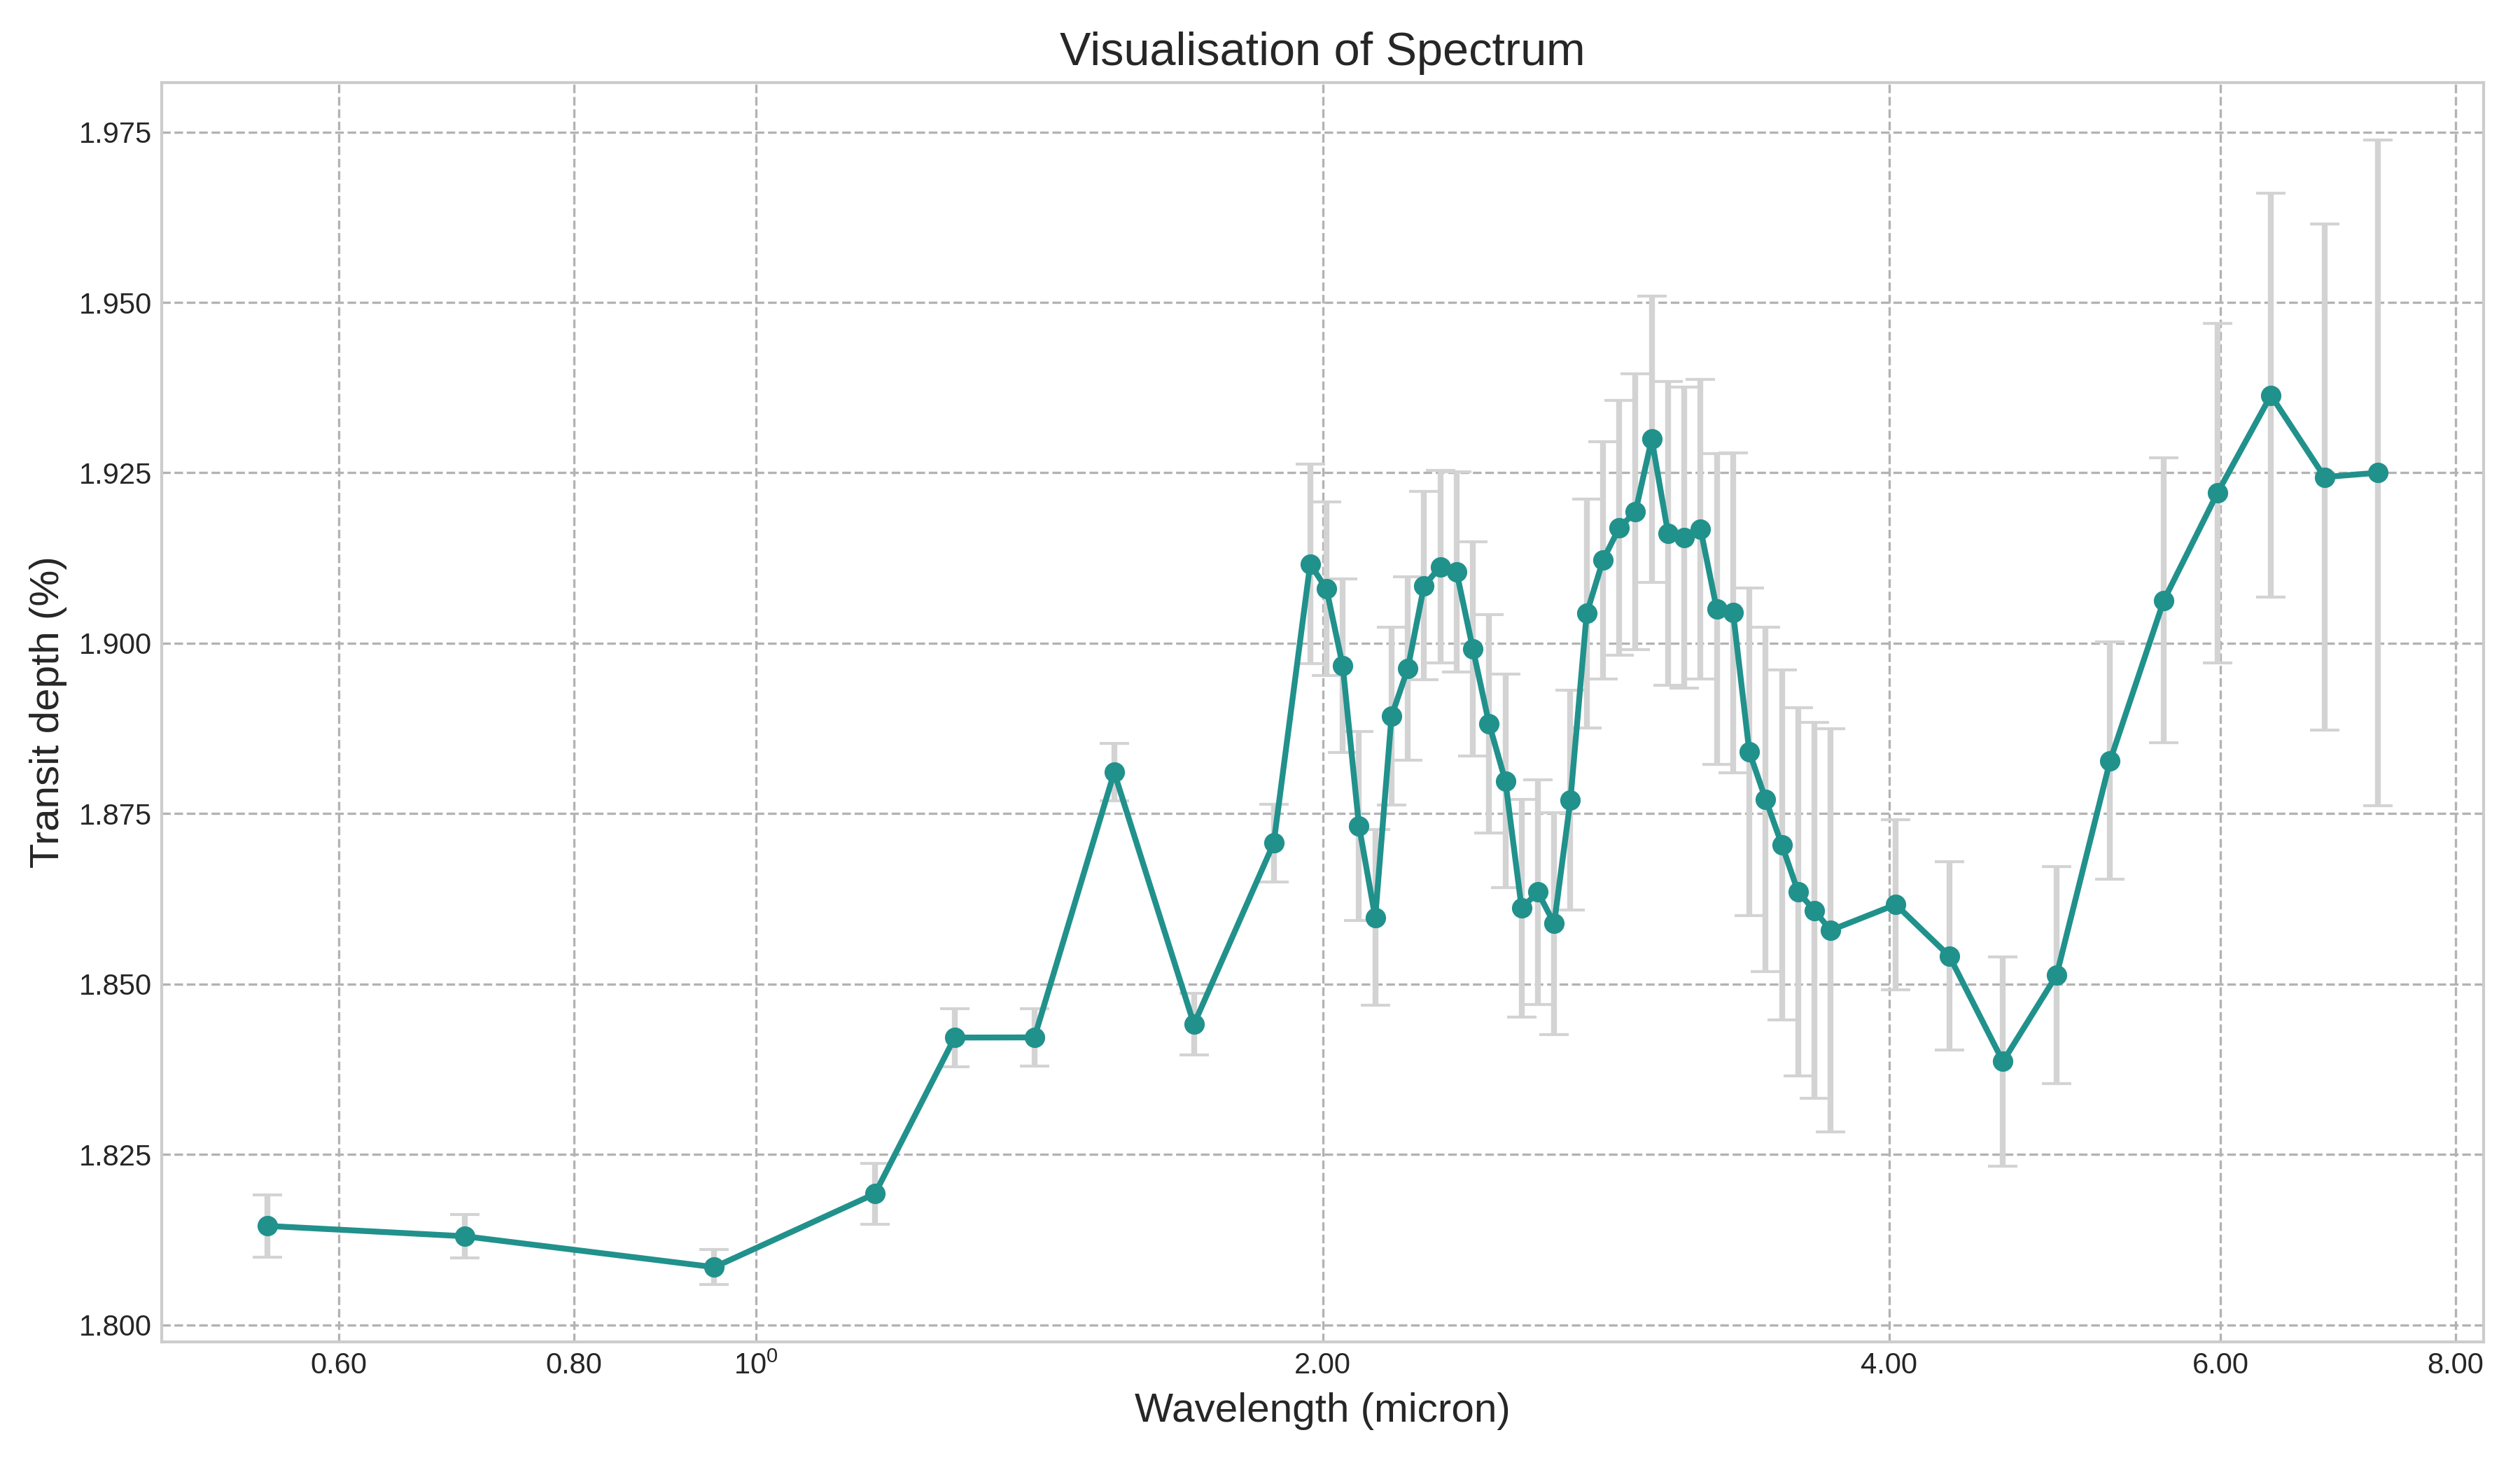

In [2]:
from IPython.display import Image
Image(filename='my_spectrum.png')

In [3]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("small_astro.csv")

In [4]:
df_backup = df.copy()
df_backup.head(10)

,Unnamed: 0,planet_radius,planet_temp,log_h2o,log_co2,log_co,log_ch4,log_nh3,x1,x2,...,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52
0,1,0.559620,863.394770,-8.865868,-6.700707,-5.557561,-8.957615,-3.097540,0.003836,0.003834,...,0.003938,0.003941,0.003903,0.003931,0.003983,0.004019,0.004046,0.004072,0.004054,0.004056
1,2,1.118308,1201.700465,-4.510258,-8.228966,-3.565427,-7.807424,-3.633658,0.015389,0.015148,...,0.015450,0.015447,0.015461,0.015765,0.016099,0.016376,0.016549,0.016838,0.016781,0.016894
2,3,0.400881,1556.096477,-7.225472,-6.931472,-3.081975,-8.567854,-5.378472,0.002089,0.002073,...,0.001989,0.002168,0.002176,0.002123,0.002079,0.002081,0.002106,0.002167,0.002149,0.002185
3,4,0.345974,1268.624884,-7.461157,-5.853334,-3.044711,-5.149378,-3.815568,0.002523,0.002392,...,0.002745,0.003947,0.004296,0.003528,0.003352,0.003629,0.003929,0.004363,0.004216,0.004442
4,5,0.733184,1707.323564,-4.140844,-7.460278,-3.181793,-5.996593,-4.535345,0.002957,0.002924,...,0.003402,0.003575,0.003667,0.003740,0.003823,0.003904,0.003897,0.004004,0.004111,0.004121
5,6,0.161165,620.185809,-4.875000,-5.074766,-3.861240,-5.388011,-8.390503,0.000444,0.000442,...,0.000432,0.000486,0.000473,0.000462,0.000447,0.000455,0.000455,0.000457,0.000463,0.000474
6,7,0.194312,900.597575,-8.299899,-6.850709,-4.314491,-3.712038,-3.951455,0.001794,0.001721,...,0.001048,0.001052,0.000948,0.000976,0.001122,0.001274,0.001395,0.001522,0.001456,0.001823
7,8,1.132685,1176.443900,-6.765865,-7.398548,-3.378307,-3.763737,-5.881384,0.012950,0.012946,...,0.014019,0.013871,0.013810,0.013902,0.014024,0.014150,0.014298,0.014392,0.014401,0.015042
8,9,0.158621,1189.209841,-8.376041,-6.321977,-3.243900,-8.711851,-3.449195,0.000444,0.000445,...,0.000562,0.000595,0.000571,0.000590,0.000628,0.000663,0.000692,0.000734,0.000718,0.000736
9,10,0.660642,528.023669,-3.804286,-8.919378,-4.686964,-8.150277,-3.068319,0.008997,0.009035,...,0.009435,0.009375,0.009315,0.009357,0.009563,0.009739,0.009821,0.009890,0.009819,0.009734


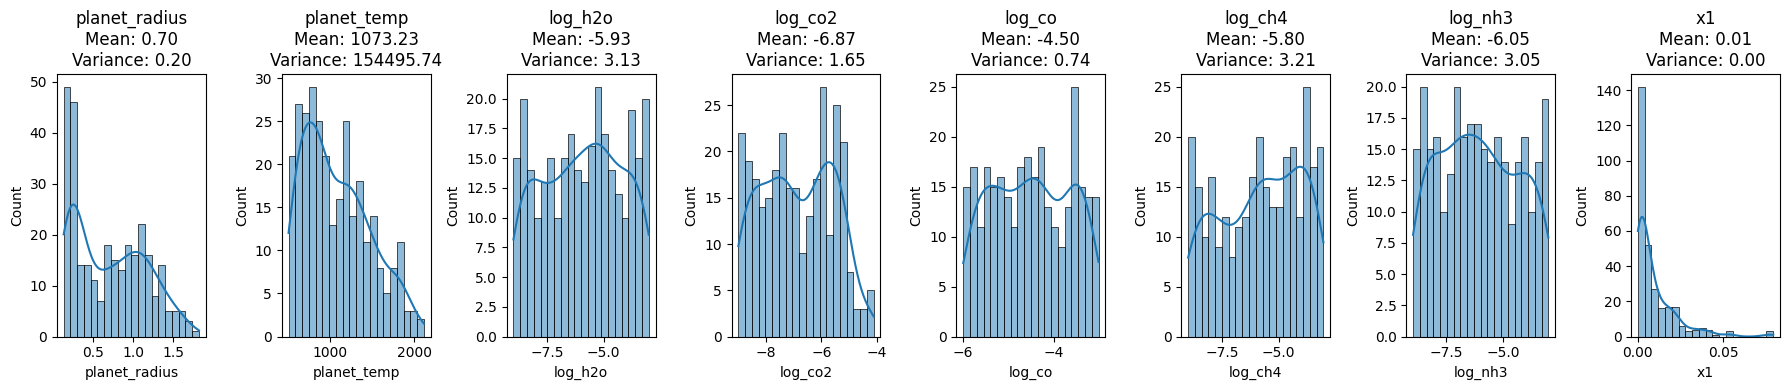

(planet_radius       0.703714
 planet_temp      1073.229674
 log_h2o            -5.934889
 log_co2            -6.873009
 log_co             -4.497141
 log_ch4            -5.799850
 log_nh3            -6.051791
 dtype: float64,
 planet_radius         0.198990
 planet_temp      154495.743225
 log_h2o               3.130868
 log_co2               1.649658
 log_co                0.738255
 log_ch4               3.208283
 log_nh3               3.050545
 dtype: float64,
 0.009442470522591322,
 0.00016172106267489707)

In [5]:
# Columns of interest for planetary and chemical properties and transit depth
feature_columns = df.columns[1:8]
transit_depth_column = 'x1' # pick the first wavelength

# Calculate mean and variance for features and transit depth
feature_mean = df[feature_columns].mean()
feature_variance = df[feature_columns].var()
transit_depth_mean = df[transit_depth_column].mean()
transit_depth_variance = df[transit_depth_column].var()

# Visualize the distributions
fig, axes = plt.subplots(1, 8, figsize=(18, 4))
for i, col in enumerate(feature_columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'{col}\nMean: {feature_mean[col]:.2f}\nVariance: {feature_variance[col]:.2f}')

# Add visualization for transit depth
sns.histplot(df[transit_depth_column], bins=20, kde=True, ax=axes[-1])
axes[-1].set_title(f'{transit_depth_column}\nMean: {transit_depth_mean:.2f}\nVariance: {transit_depth_variance:.2f}')

plt.tight_layout()
plt.show()

feature_mean, feature_variance, transit_depth_mean, transit_depth_variance

## Exoplanet Feature Distributions

The provided visualizations and statistics shed light on the distribution of various exoplanetary features and the observed transit depth at the `x1` wavelength.

- **Planet Radius**: This feature, with a mean value of approximately 0.7037 and variance of 0.1989, mostly lies between 0.5 and 1.5 as depicted in its histogram.
  
- **Planet Temperature**: Exhibiting a wider spread, the temperature has a mean of approximately 1073.29 K and variance of 154495.74 K².

- **Logarithmic Concentrations**:
  - **H₂O**: Mean concentration of -5.93 with a variance of 3.13.
  - **CO₂**: Mean concentration of -6.87 with a variance of 1.65.
  - **CO**: Mean concentration of -4.50 with a variance of 0.74.
  - **CH₄**: Mean concentration of -5.80 with a variance of 3.21.
  - **NH₃**: Mean concentration of -6.05 with a variance of 3.05.

- **Transit Depth at x1 Wavelength**: This depth, crucial for exoplanet detection, has an almost singular value near 0, with a mean of approximately 0.0094 and a negligible variance of 0.00006.

These distributions and their accompanying statistics offer invaluable insights into the data's nature and its inherent variability, essential for accurate spectral analysis and interpretation.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


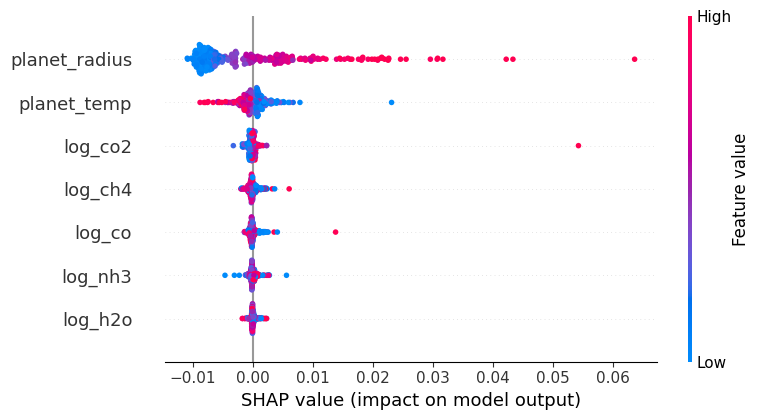

In [6]:
# Import required libraries for modeling and SHAP values
import xgboost as xgb
import shap

# Prepare the feature matrix (X) and the target vector (y)
X = df.iloc[:, 1:8]
y = df['x1']

# Train an XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X, y)

# Initialize the SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer(X)

# Summary plot for SHAP values
shap.summary_plot(shap_values, X, title='Shapley Feature Importance')


SHAP (SHapley Additive exPlanations) values stem from cooperative game theory and provide a way to interpret machine learning model predictions. Each feature in a model is analogous to a player in a game, and the contribution of each feature to a prediction is like the payout a player receives in the game. In SHAP, we calculate the value of each feature by considering all possible combinations (coalitions) of features, assessing the change in prediction with and without that feature. The resulting value, the Shapley value, represents the average contribution of a feature to all possible predictions.

The summary plot visualizes these values. Each dot represents a SHAP value for a specific instance of a feature; positive values (right of the centerline) indicate that a feature increases the model's output, while negative values (left of the centerline) suggest a decrease. The color depicts the actual value of the feature for the given instance, enabling a comprehensive view of feature influence across the dataset.


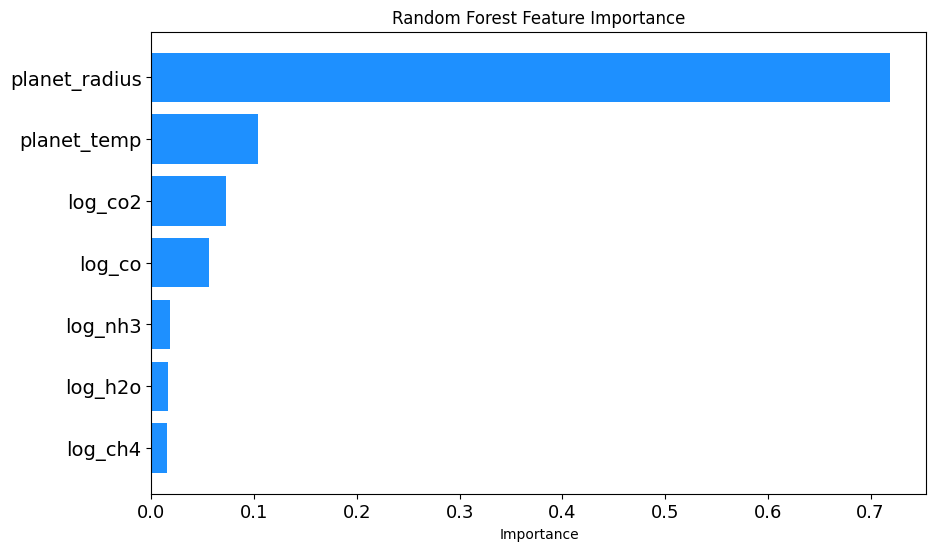

array([0.71850575, 0.10367982, 0.01655567, 0.07232808, 0.05603188,
       0.0146824 , 0.0182164 ])

In [7]:
# Import the Random Forest Regressor and visualization libraries
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

# Create a horizontal bar chart for feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.ylabel('')
plt.title('Random Forest Feature Importance')
plt.xticks(fontsize=13)  # Increase the font size of the x-axis tick labels
plt.yticks(fontsize=14)  # Increase the font size of the x-axis tick labels
# Save the figure before showing it
plt.savefig('random_forest_importance_plot.png', bbox_inches='tight', dpi=300)  # 'bbox_inches' ensures the entire plot is saved

plt.show()



feature_importances

## Random Forest Feature Importance Analysis

To gain insights into which exoplanetary features most influence the observed transit depth, a Random Forest Regressor was utilized. Here's an outline of the procedure:

1. **Model Initialization**: A Random Forest Regressor model was instantiated with 100 trees and a fixed random seed of 42 for reproducibility.

2. **Model Training**: The model was trained on the feature set `X` and target variable `y`.

3. **Feature Importance Extraction**: After training, the importance of each feature was extracted using the `feature_importances_` attribute of the trained model.

4. **Data Preparation for Visualization**: A DataFrame was created to house each feature alongside its respective importance. The features were then sorted in ascending order of importance for better visualization.

5. **Visualization**: A horizontal bar chart was plotted to showcase the importance of each feature. The chart offers a clear visual comparison, with the y-axis representing the features and the x-axis indicating their importance. Special attention was paid to font size adjustments for better readability. Furthermore, before displaying the chart, it was saved as a PNG image with high resolution.

The resulting visualization, titled 'Random Forest Feature Importance', provides a clear understanding of the relative significance of each feature in predicting the transit depth, as discerned by the Random Forest model.


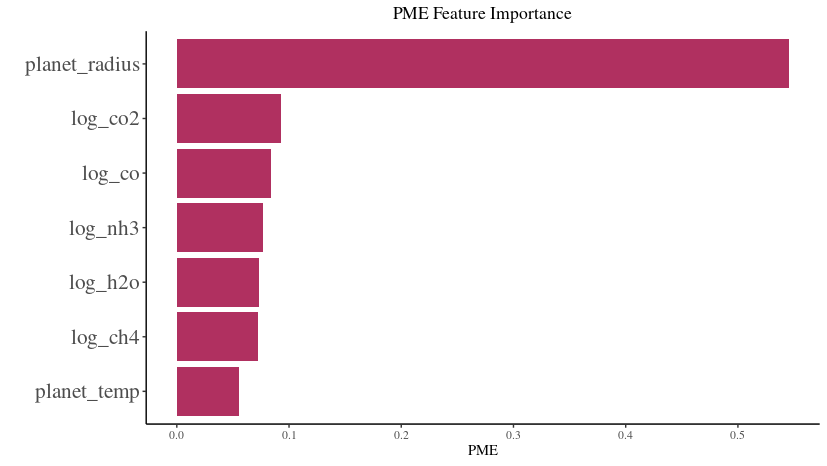

In [8]:
from IPython.display import Image
Image(filename='PME.png')


## PME Feature Importance Analysis

Using a modeling technique, the impact of different exoplanetary features on the observed transit depth was assessed, and their importance was visualized in the attached figure titled 'PME Feature Importance'. Here's a breakdown of the visual representation:

1. **Most Influential Feature**: The `planet_radius` stands out as the most influential feature with the highest PME (Predictive Modeling Estimate) value. This suggests that the radius of the planet plays a pivotal role in determining the observed transit depth.

2. **Other Features**: Logarithmic concentrations of gases, such as `log_co2`, `log_co`, `log_nh3`, `log_h2o`, and `log_ch4`, also exhibit varying degrees of importance. Among these, `log_co2` and `log_co` are the more significant contributors compared to others.

3. **Least Influential Feature**: The `planet_temp`, representing the temperature of the planet, has the least importance in this analysis, suggesting its minimal role in influencing the transit depth, at least according to the PME metric.

4. **Visual Clarity**: The horizontal bar chart offers a lucid comparison of feature importances. Each bar's length represents the PME value of a feature, providing a direct visual cue to its significance.

5. **Interpretation**: This visualization aids in discerning which exoplanetary characteristics are most relevant when predicting the transit depth using the given model. It can guide future analyses by highlighting key features to focus on or, conversely, those that might be less consequential.

By examining the 'PME Feature Importance' chart, one gains a deeper understanding of the relative significance of each feature in predicting the transit depth within this specific modeling context.


## Uncertainty Quantification and Feature Reduction in PME Feature Importance Analysis

When delving deep into the realms of uncertainty quantification and feature reduction in predictive modeling, it's crucial to evaluate feature importance metrics critically. The provided PME (Predictive Modeling Estimate) Feature Importance Analysis offers a valuable lens for this task. Below is a nuanced exploration of its significance in the described contexts:

### **Uncertainty Quantification**:

1. **Origin of Uncertainty**: 
    - In exoplanetary spectral analysis, uncertainty can arise from observational noise, instrumental errors, or intrinsic variability of the observed phenomena. This uncertainty often manifests in the form of error bars in spectra, like the ones shown in transit depth against wavelengths.

2. **Feature Impact on Uncertainty**: 
    - The degree of influence a feature has on the predicted outcome can be a proxy for how that feature might contribute to the overall predictive uncertainty. If a feature like `planet_radius` has a high PME value, it might be a critical determinant of transit depth. Any uncertainty in measuring or estimating the `planet_radius` could propagate and significantly affect the prediction's reliability.

3. **PME as a Measure of Stochastic Uncertainty**: 
    - The PME values themselves might be obtained by analyzing a model's sensitivity to perturbations in input features. A high PME value indicates that slight changes in the feature can lead to notable changes in the output, thereby implying a greater inherent stochastic uncertainty tied to that feature.

### **Feature Reduction**:

1. **Identifying Critical Features**: 
    - When dealing with a multitude of features, not all may be equally relevant. The PME analysis provides a hierarchy of feature importance. In this case, while `planet_radius` emerges as crucial, `planet_temp` appears less consequential. This differentiation is fundamental for feature reduction, guiding us on which features to prioritize in modeling.

2. **Reducing Dimensionality & Complexity**: 
    - In data-driven modeling, especially with limited data points, overfitting is a genuine concern. By understanding which features significantly influence the predictions (like `planet_radius` or `log_co2`), one can potentially reduce the model's complexity and the risk of overfitting by focusing only on these paramount features.

3. **Informing Experimental Design**: 
    - If further observational or experimental data is required, knowing feature importances can guide where resources are channeled. For instance, more precise measurements might be sought for features with high PME values, as their accurate estimation is vital for reliable predictions.

4. **Trade-off with Predictive Performance**: 
    - It's essential to understand that while feature reduction can simplify models and make them more interpretable, there's always a trade-off with predictive performance. Removing features based on their PME values should be done judiciously, ensuring that the model's predictive capability isn't unduly compromised.

In summary, the 'PME Feature Importance' chart isn't merely a representation of feature significance but serves as a cornerstone for rigorous analytical decisions in uncertainty quantification and feature reduction. Analyzing such importance metrics within the broader context of the problem at hand ensures that models are both robust and interpretable, catering effectively to the dual objectives of predictive accuracy and analytical clarity.


### Weighted Principal Component Analysis (PCA) on Exoplanet Data

#### **Conceptual Overview**:

PCA is a method used to emphasize variation and capture strong patterns in a dataset. The "weighted PCA" approach fine-tunes this by considering the importance of different features, effectively giving more attention to features deemed vital.

#### **Detailed Breakdown**:

1. **Standardization**:
    - Before applying PCA, the dataset is standardized to give each feature a mean of 0 and a variance of 1. This is essential because PCA is influenced by the scale of the data.

2. **Weighted Features**:
    - Features are weighted according to their importance, as identified by the Random Forest model. Taking the square root of the weights ensures proper scaling during matrix multiplication in PCA.

3. **PCA Application**:
    - PCA projects the data into a new space defined by its principal components. The first two components often hold most of the dataset's variance, making them crucial for visualization.

4. **Visualization**:
    - The scatter plot visualizes the data in the space of the first two principal components. The color indicates `Transit Depth (x1)`, shedding light on how this parameter varies across the main patterns in the data.

5. **Explained Variance**:
    - This provides an understanding of how much original variance the first two components capture. A high percentage indicates that the PCA representation retains much of the data's original structure.

#### **Significance**:

1. **Data Compression**:
    - PCA offers a simplified yet rich representation of the data, which can be invaluable for visualization and pattern recognition.

2. **Feature Emphasis**:
    - Using feature importances ensures the PCA representation highlights the most critical patterns related to influential features.

3. **Framework for Further Exploration**:
    - Observing patterns or groupings in the PCA plot can guide subsequent investigations, pinpointing areas of interest or potential clusters.

4. **Efficient Data Overview**:
    - The visualization provides a comprehensive but digestible overview of the data, suitable for a wide range of audiences.

In essence, weighted PCA melds the dimensionality reduction capabilities of PCA with the interpretative power of feature importances, offering a profound view into the dataset's intricate structures and relationships.



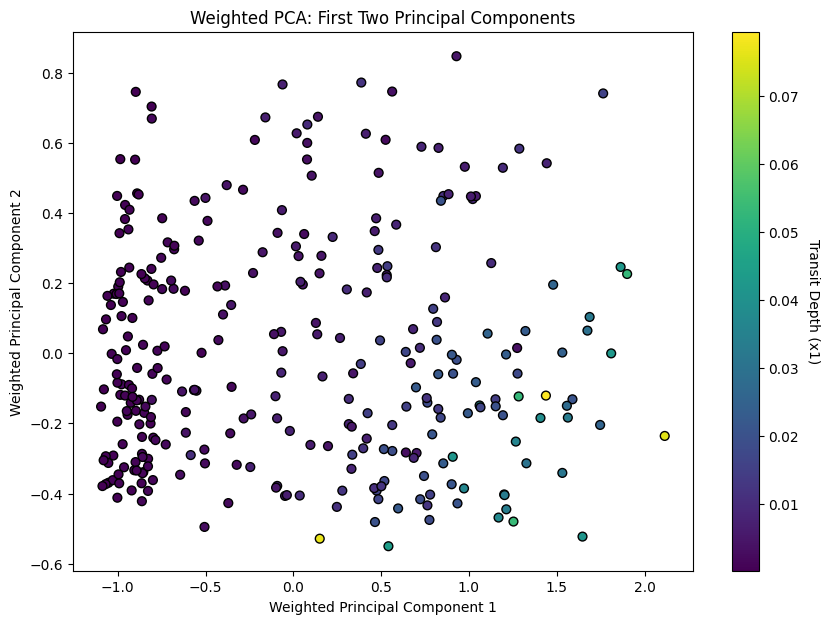

array([0.71985328, 0.10370239])

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the feature matrix
X_scaled = StandardScaler().fit_transform(X)

# Multiply each feature by its square root of importance weight for weighted PCA
# The square root is used because each feature contributes to both rows and columns in the dot product calculation
X_weighted = X_scaled * np.sqrt(feature_importances)

# Perform PCA on the weighted data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_weighted)

# Plotting the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.colorbar().set_label('Transit Depth (x1)', rotation=270, labelpad=15)
plt.xlabel('Weighted Principal Component 1')
plt.ylabel('Weighted Principal Component 2')
plt.title('Weighted PCA: First Two Principal Components')
plt.show()

# Variance explained by the first two principal components
variance_explained = pca.explained_variance_ratio_
variance_explained


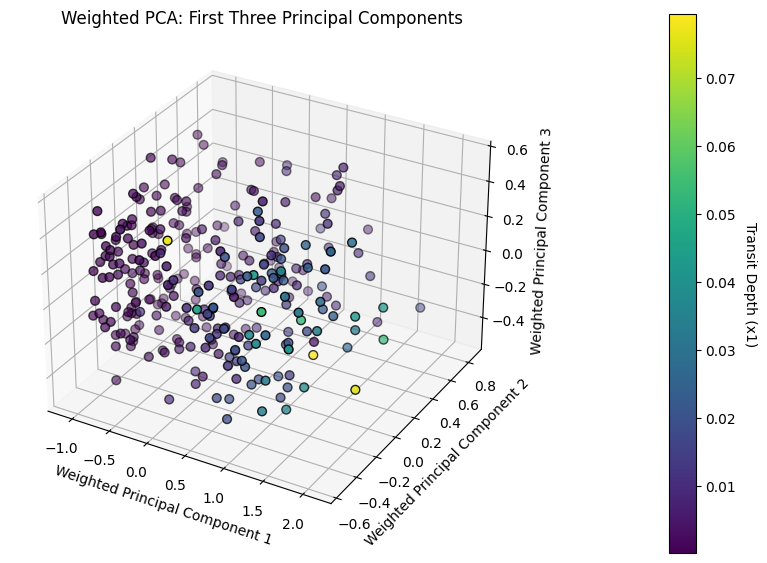

array([0.71985328, 0.10370239, 0.07160805])

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Your data initialization (this part is assumed, as you haven't provided it in the original code)
# X, y, feature_importances = ...

# Standardize the feature matrix
X_scaled = StandardScaler().fit_transform(X)

# Multiply each feature by its square root of importance weight for weighted PCA
X_weighted = X_scaled * np.sqrt(feature_importances)

# Perform PCA on the weighted data with three components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_weighted)

# Plotting the first three principal components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k', s=40)
plt.colorbar(scatter, ax=ax, pad=0.2).set_label('Transit Depth (x1)', rotation=270, labelpad=15)
ax.set_xlabel('Weighted Principal Component 1')
ax.set_ylabel('Weighted Principal Component 2')
ax.set_zlabel('Weighted Principal Component 3')
plt.title('Weighted PCA: First Three Principal Components')
plt.show()

# Variance explained by the first three principal components
variance_explained = pca.explained_variance_ratio_
variance_explained


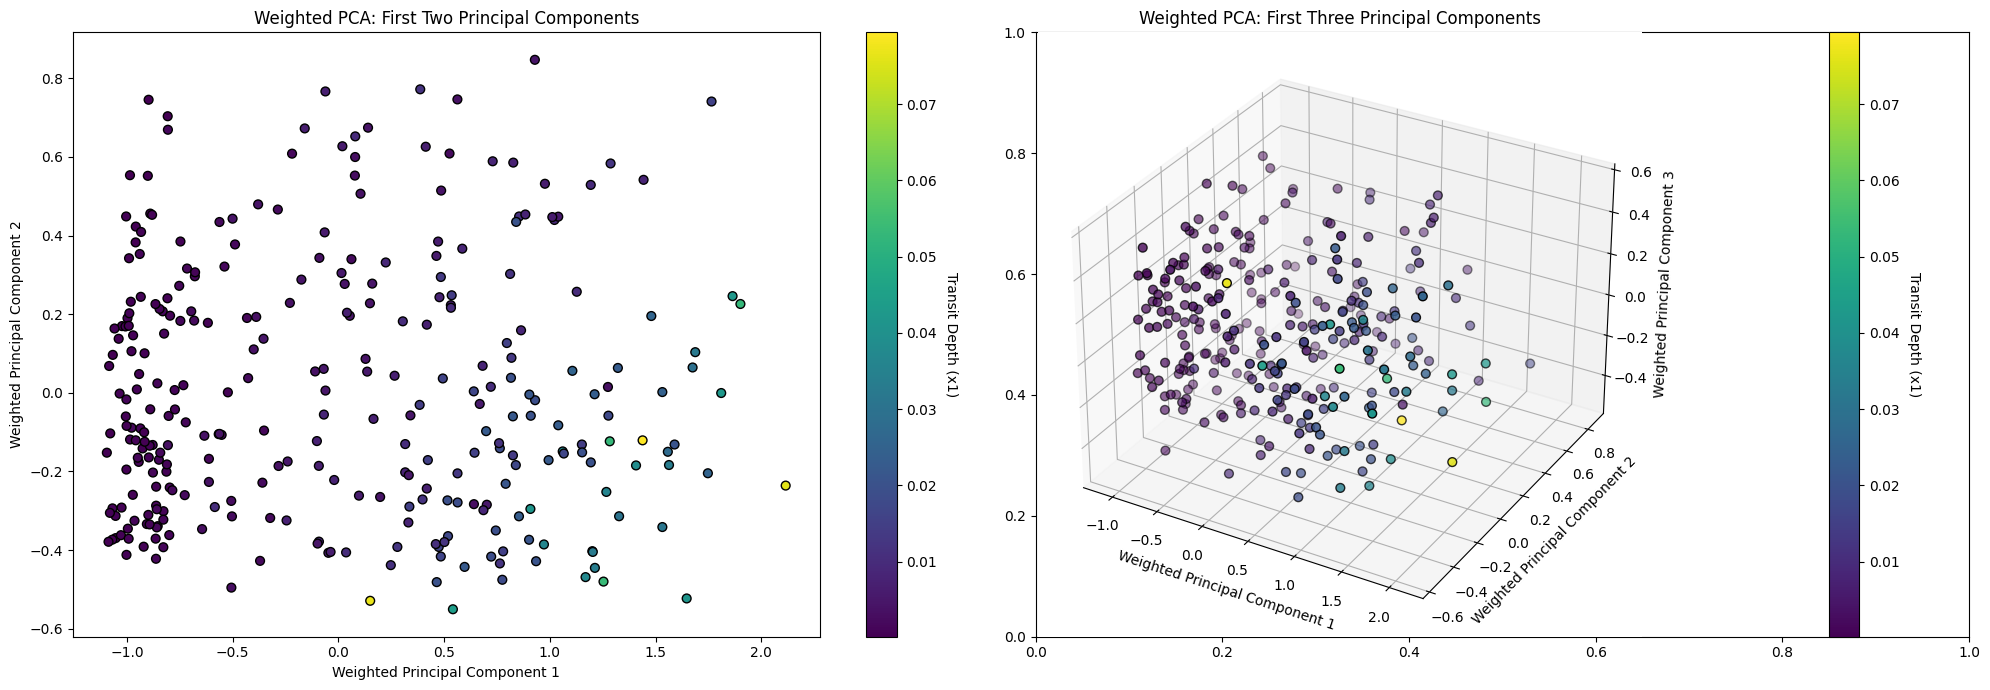

In [11]:
# side by side
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Your data initialization (this part is assumed, as you haven't provided it in the original code)
# X, y, feature_importances = ...

# Standardize the feature matrix
X_scaled = StandardScaler().fit_transform(X)

# Multiply each feature by its square root of importance weight for weighted PCA
X_weighted = X_scaled * np.sqrt(feature_importances)

# Create a combined figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Perform PCA on the weighted data with two components and plot
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_weighted)
scatter_2d = axes[0].scatter(X_pca2[:, 0], X_pca2[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
fig.colorbar(scatter_2d, ax=axes[0], orientation='vertical').set_label('Transit Depth (x1)', rotation=270, labelpad=15)
axes[0].set_xlabel('Weighted Principal Component 1')
axes[0].set_ylabel('Weighted Principal Component 2')
axes[0].set_title('Weighted PCA: First Two Principal Components')

# Perform PCA on the weighted data with three components and plot
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_weighted)
ax3d = fig.add_subplot(1, 2, 2, projection='3d')
scatter_3d = ax3d.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=y, cmap='viridis', edgecolor='k', s=40)
fig.colorbar(scatter_3d, ax=ax3d, pad=0.2).set_label('Transit Depth (x1)', rotation=270, labelpad=15)
ax3d.set_xlabel('Weighted Principal Component 1')
ax3d.set_ylabel('Weighted Principal Component 2')
ax3d.set_zlabel('Weighted Principal Component 3')
ax3d.set_title('Weighted PCA: First Three Principal Components')

# Display the combined plot
plt.tight_layout()
plt.savefig('wPCA_2D_3D.png', bbox_inches='tight', dpi=300)  # 'bbox_inches' ensures the entire plot is saved

plt.show()


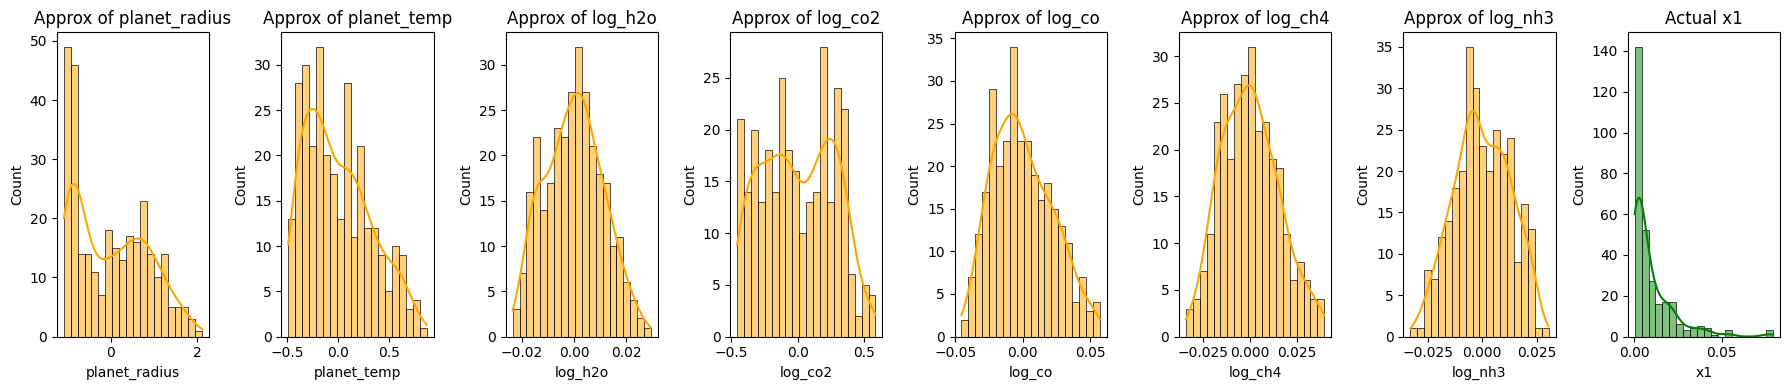

In [12]:
import pandas as pd
import seaborn as sns

# Your data initialization (this part is assumed, as you haven't provided it in the original code)
# df, feature_columns, transit_depth_column = ...

# Reconstruct the approximate original data using the first three principal components
reconstructed_data = np.dot(X_pca, pca.components_[:3, :]) + np.mean(X_scaled, axis=0)

# Create a DataFrame for the reconstructed data
reconstructed_df = pd.DataFrame(reconstructed_data, columns=feature_columns)

# Visualize the approximate original histograms
fig, axes = plt.subplots(1, len(feature_columns) + 1, figsize=(18, 4))  # Adjusted for the number of features
for i, col in enumerate(feature_columns):
    sns.histplot(reconstructed_df[col], bins=20, kde=True, ax=axes[i], color='orange')
    axes[i].set_title(f'Approx of {col}')

# Add visualization for actual transit depth (since it was not part of the PCA)
sns.histplot(df[transit_depth_column], bins=20, kde=True, ax=axes[-1], color='green')
axes[-1].set_title(f'Actual {transit_depth_column}')

plt.tight_layout()
plt.show()


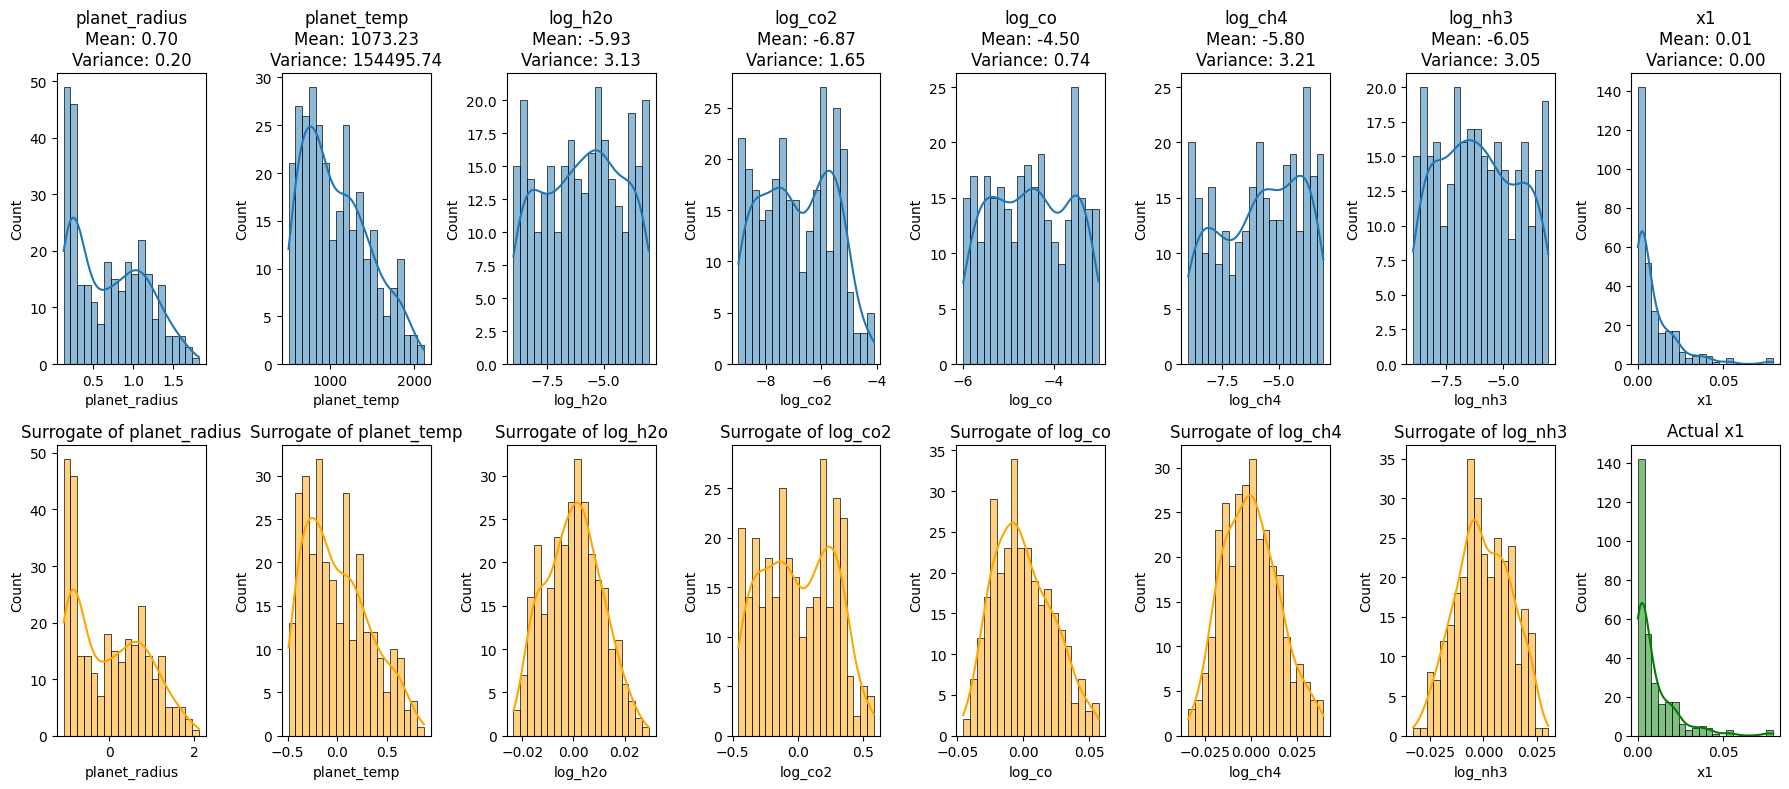

In [14]:

fig, axes = plt.subplots(2, 8, figsize=(18, 8))

# Original Data
for i, col in enumerate(feature_columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'{col}\nMean: {feature_mean[col]:.2f}\nVariance: {feature_variance[col]:.2f}')

sns.histplot(df[transit_depth_column], bins=20, kde=True, ax=axes[0, -1])
axes[0, -1].set_title(f'{transit_depth_column}\nMean: {transit_depth_mean:.2f}\nVariance: {transit_depth_variance:.2f}')

# Reconstructed Data
for i, col in enumerate(feature_columns):
    sns.histplot(reconstructed_df[col], bins=20, kde=True, ax=axes[1, i], color='orange')
    axes[1, i].set_title(f'Surrogate of {col}')

sns.histplot(df[transit_depth_column], bins=20, kde=True, ax=axes[1, -1], color='green')
axes[1, -1].set_title(f'Actual {transit_depth_column}')

plt.tight_layout()
plt.show()


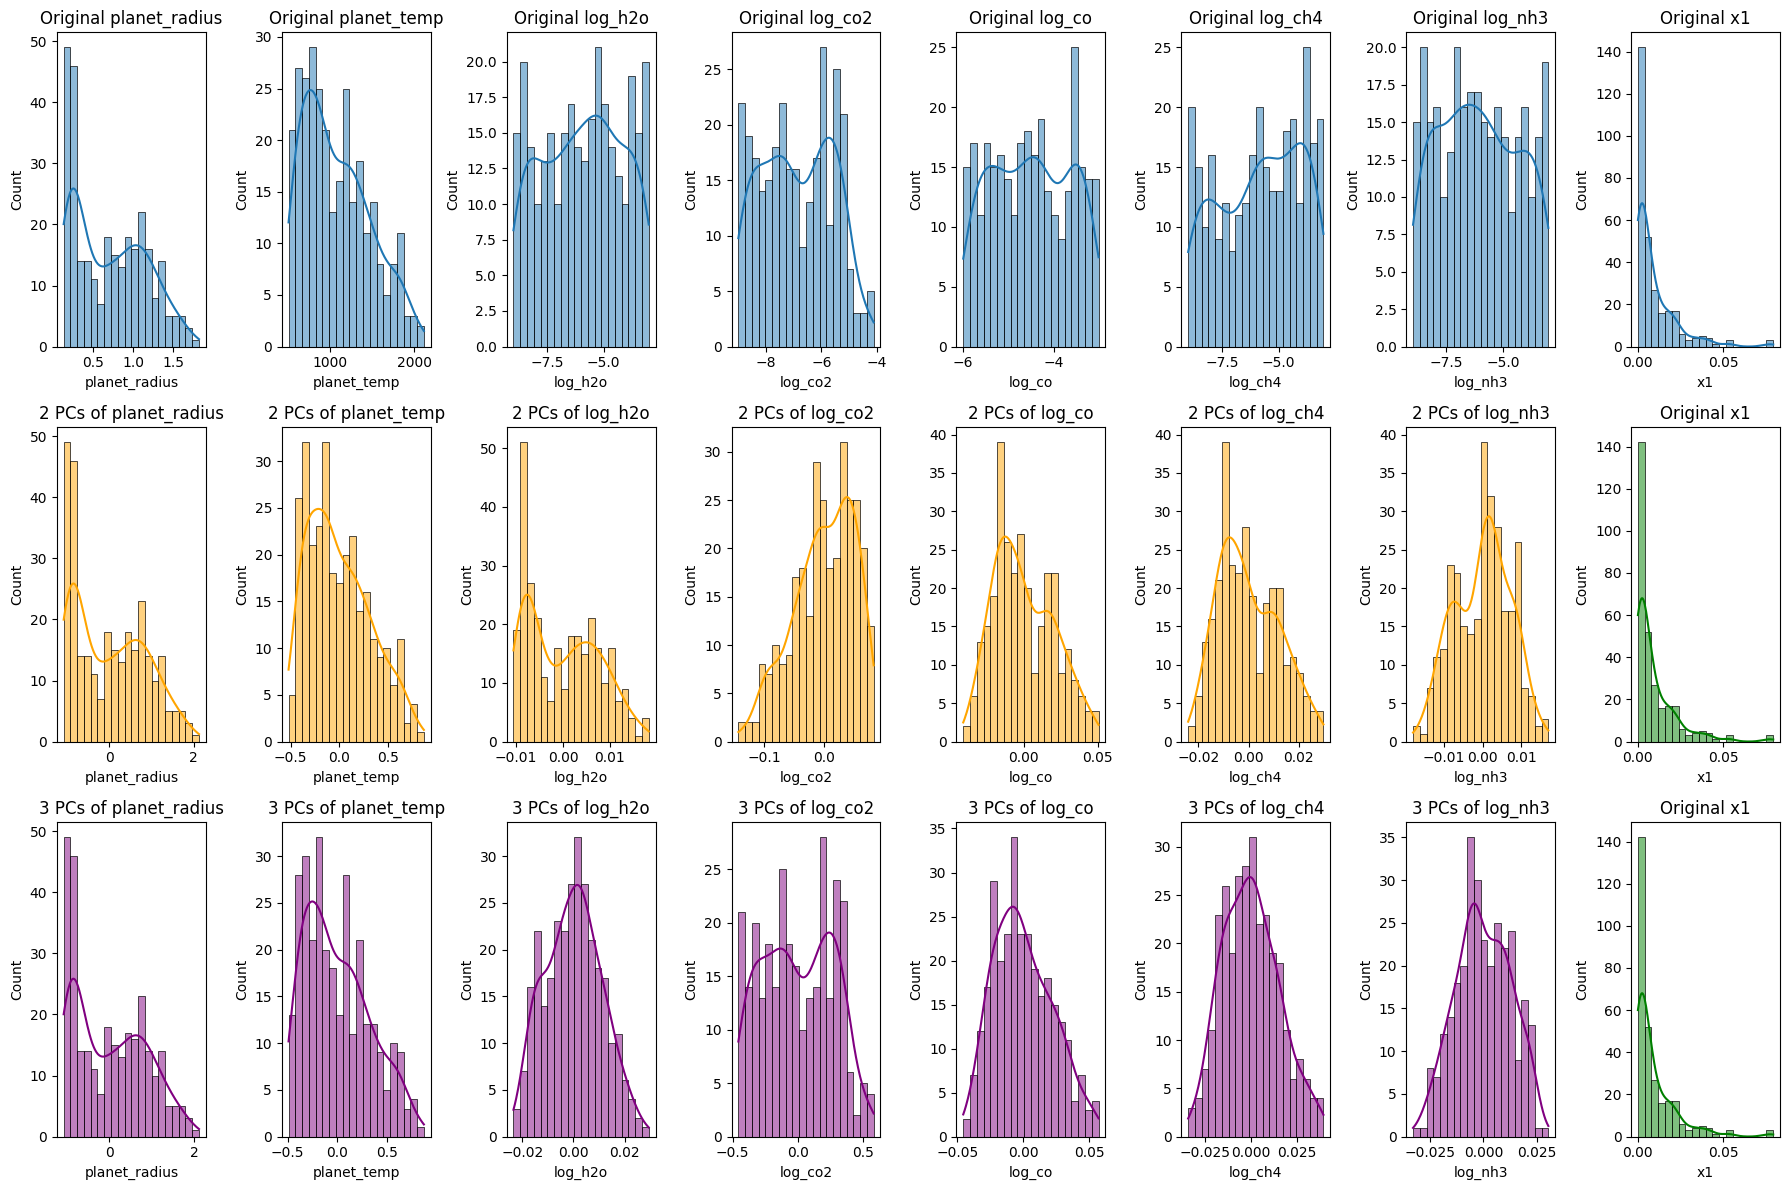

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming data initialization and feature_importances, feature_columns, and transit_depth_column definitions exist

# Standardize the feature matrix
X_scaled = StandardScaler().fit_transform(X)

# Multiply each feature by its square root of importance weight for weighted PCA
X_weighted = X_scaled * np.sqrt(feature_importances)

# Initialize the figure and axes
fig, axes = plt.subplots(3, len(feature_columns) + 1, figsize=(18, 12))

# Original Data histograms
for i, col in enumerate(feature_columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Original {col}')

sns.histplot(df[transit_depth_column], bins=20, kde=True, ax=axes[0, -1])
axes[0, -1].set_title(f'Original {transit_depth_column}')

# Reconstruction using 2 PCs
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_weighted)
reconstructed_data_2PCs = np.dot(X_pca2, pca2.components_[:2, :]) + np.mean(X_scaled, axis=0)
reconstructed_df_2PCs = pd.DataFrame(reconstructed_data_2PCs, columns=feature_columns)

for i, col in enumerate(feature_columns):
    sns.histplot(reconstructed_df_2PCs[col], bins=20, kde=True, ax=axes[1, i], color='orange')
    axes[1, i].set_title(f'2 PCs of {col}')

sns.histplot(df[transit_depth_column], bins=20, kde=True, ax=axes[1, -1], color='green')
axes[1, -1].set_title(f'Original {transit_depth_column}')

# Reconstruction using 3 PCs
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_weighted)
reconstructed_data_3PCs = np.dot(X_pca3, pca3.components_[:3, :]) + np.mean(X_scaled, axis=0)
reconstructed_df_3PCs = pd.DataFrame(reconstructed_data_3PCs, columns=feature_columns)

for i, col in enumerate(feature_columns):
    sns.histplot(reconstructed_df_3PCs[col], bins=20, kde=True, ax=axes[2, i], color='purple')
    axes[2, i].set_title(f'3 PCs of {col}')

sns.histplot(df[transit_depth_column], bins=20, kde=True, ax=axes[2, -1], color='green')
axes[2, -1].set_title(f'Original {transit_depth_column}')

plt.tight_layout()
plt.savefig('wPCA_combined_plot.png', bbox_inches='tight', dpi=500)  # 'bbox_inches' ensures the entire plot is saved

plt.show()


### Reconstruction of Exoplanet Data Using Principal Component Analysis (PCA)

The code segment aims to reconstruct exoplanet data using different numbers of principal components (PCs) from PCA, offering insights into how much information retention occurs as we vary the number of PCs.

#### **Data Standardization**:
- The features undergo standardization, ensuring each feature has a mean of 0 and variance of 1. This normalization is crucial for PCA, as the algorithm is sensitive to varying scales across features.

#### **Weighted Features**:
- Features are adjusted based on their significance as ascertained by a prior model, specifically the Random Forest. Weighting the features adjusts the emphasis the PCA places on each feature during the dimensionality reduction process.

#### **Data Reconstruction**:
- After performing PCA, the algorithm seeks to transform the reduced data back to the original high-dimensional space. This "reconstructed" data is an approximation of the original but is built using fewer dimensions.

#### **Visualization of Reconstructions**:
1. **Original Data Histograms**:
    - The initial histograms show the distributions of the original features and the transit depth.
  
2. **Reconstruction Using 2 Principal Components**:
    - Using only the first two PCs, the data is reconstructed and its histograms visualized. This illustrates the patterns and distributions captured when only the first two components are considered.
  
3. **Reconstruction Using 3 Principal Components**:
    - An analogous reconstruction is done with three PCs. The addition of a third dimension might capture more nuanced variations in the data.

#### **Significance**:
1. **Data Compression vs. Retention**:
    - The visualizations enable us to compare the reconstructions against the original data. We discern how much information is retained and what is lost as we reduce dimensions.
  
2. **Guide for Dimensionality Decision**:
    - By juxtaposing the original with the reconstructions, we gain insights into the optimal number of PCs to use for specific tasks, striking a balance between compression and information retention.
  
3. **Empirical Understanding**:
    - These histograms and visual representations offer a tangible way to grasp the abstract notion of dimensionality reduction. They elucidate how PCA captures the essence of the data while diminishing dimensions.

In conclusion, this analysis, coupled with the visualizations, equips us with a robust understanding of how PCA reconstructs data using varying numbers of components. It underscores the trade-offs involved and the implications of choosing specific dimensionality levels in data-driven tasks.



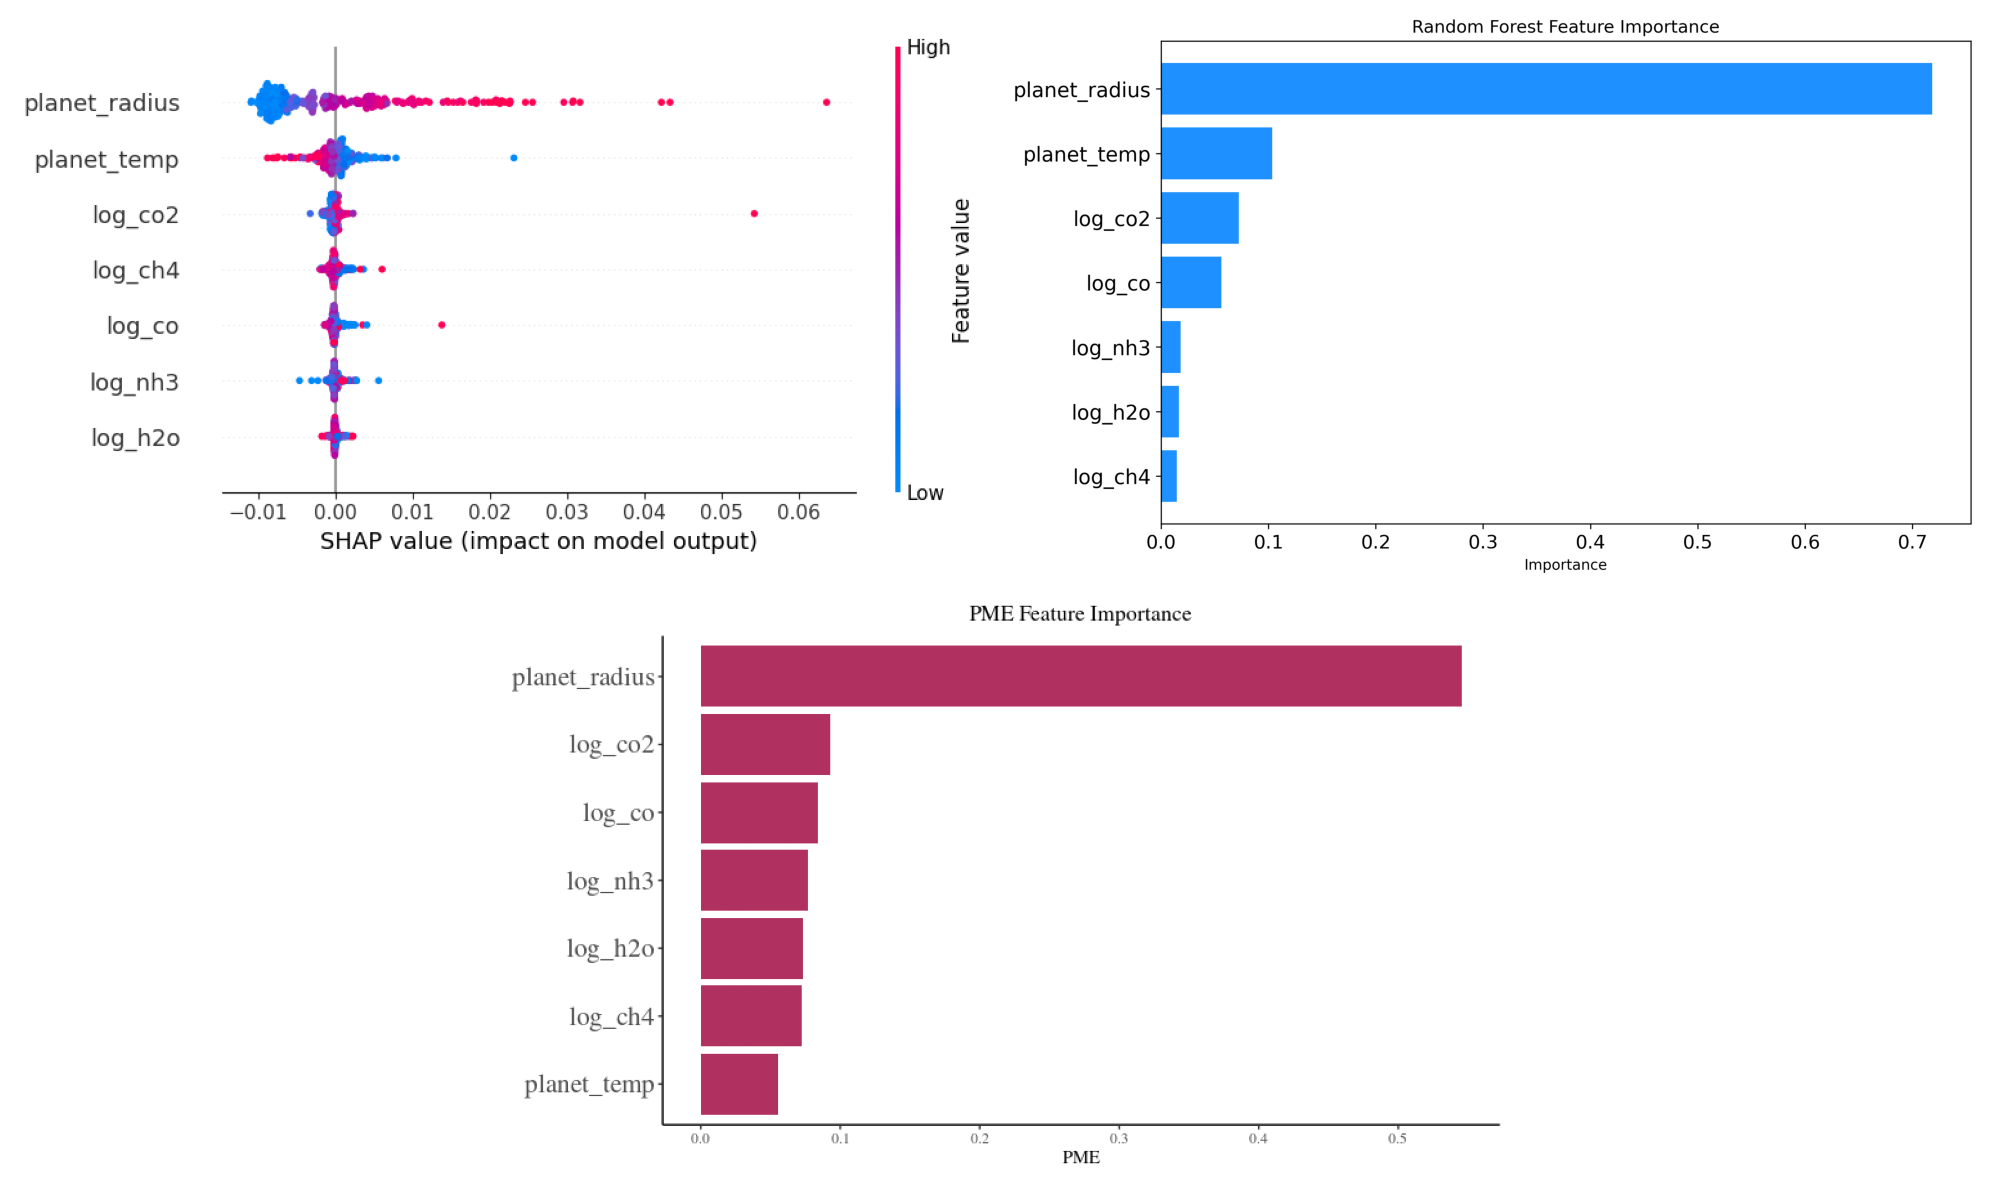

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

# Load images
img_shap = mpimg.imread('shapley.png')
img_rf = mpimg.imread('random_forest_importance_plot.png')
img_pme = mpimg.imread('PME.png')

# Create a grid for the subplots
fig_combined = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1])

# Display SHAP plot
ax0 = plt.subplot(gs[0])
ax0.imshow(img_shap)
ax0.axis('off')

# Display RF Importance plot
ax1 = plt.subplot(gs[1])
ax1.imshow(img_rf)
ax1.axis('off')

# Display PME image in the middle of the 2nd row
ax2 = plt.subplot(gs[2:4])  # This makes the PME plot span both columns on the second row
ax2.imshow(img_pme)
ax2.axis('off')

plt.tight_layout()
plt.savefig('sensitivity_combined_plot.png', bbox_inches='tight', dpi=300)  # 'bbox_inches' ensures the entire plot is saved

plt.show()



This code snippet consolidates and displays three distinct plots—SHAP values, Random Forest Feature Importance, and PME Feature Importance—into a single visualization. The images are loaded and arranged in a 2x2 grid, with the SHAP and Random Forest plots on the top row, and the PME plot spanning both columns on the bottom row. After layout adjustments, the combined visualization is saved as a high-resolution PNG image titled 'sensitivity_combined_plot.png' and then displayed.

### Reference

Changeat, Q., & Yip, K. H. (2023). ESA-Ariel Data Challenge NeurIPS 2022: Introduction to exo-atmospheric studies and presentation of the Atmospheric Big Challenge (ABC) Database. *arXiv preprint arXiv:2206.14633*.

Herin, M., Il Idrissi, M., Chabridon, V., & Iooss, B. (2022). Proportional marginal effects for global sensitivity analysis. arXiv preprint arXiv:2210.13065.




In [1]:
!jupyter nbconvert research_statement.ipynb --to markdown --NbConvertApp.output_files_dir=.


[NbConvertApp] Converting notebook research_statement.ipynb to markdown
[NbConvertApp] Support files will be in ./
[NbConvertApp] Writing 36217 bytes to research_statement.md


In [2]:
!cat research_statement.md | tee -a index.qmd


```python
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
```

The figure below showcases a spectrum integral to exoplanet detection, charting the transit depth against the wavelength in microns. Every observation point in the spectrum carries an inherent uncertainty, denoted by the vertical error bars. To decode and potentially minimize this uncertainty, it's pivotal to fathom how features like `planet radius`, `planet temperature`, and the logarithmic concentrations of `H₂O`, `CO₂`, `CO`, `CH₄`, and `NH₃` influence the transit depth. Leveraging interpretative tools like SHAP can provide insights into how these exoplanetary features impact the observed transit depth, refining our understanding and accuracy in exoplanet spectral analysis.


```python
from IPython.display import Image
Image(filename='my_spectrum.png')
```




    
![png](./research_statement_2_0.png)
    




```python
# Load the CSV file into a Pa

In [3]:
!rm research_statement.md
